In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import tqdm

In [2]:
Data = torch.load('dtnamicData.pt')

In [3]:
Data.shape

torch.Size([3, 101])

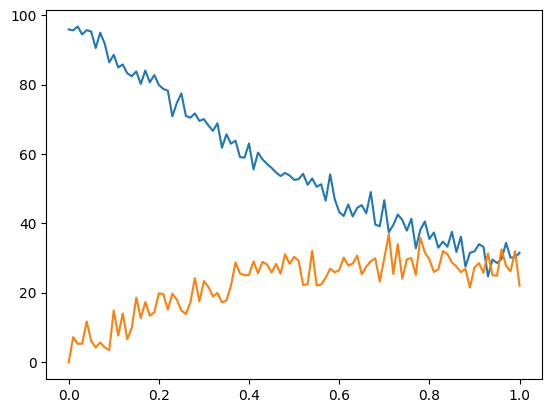

In [5]:
plt.plot(Data[0,:], Data[1,:])
plt.plot(Data[0,:], Data[2,:])



In [6]:
def fwd_solve(y0, theta, dt, nt):

  A = torch.zeros(2,2)
  Ka = 10**theta[0]
  CL = 10**theta[1]
  V  = 10**theta[2]
  A[0,0] = -Ka  
  A[1,0] = Ka/V
  A[1,1] = -CL/V

  # forward Euler
  Y = torch.zeros(2, nt+1)
  T = torch.zeros(nt+1)
  Y[:,0] = y0

  for i in range(nt):
    Y[:,i+1] = Y[:,i] + (A@Y[:,i])*dt
    T[i+1] = T[i] + dt
  return Y, T

In [18]:
y0 = Data[1:,0]
y0[1] = 0
print(y0)
t = Data[0,:]
dt = t[1]-t[0]
nt = 100

theta = 1/2*torch.rand(3)
Y, T = fwd_solve(y0, theta, dt, nt)

tensor([95.9186,  0.0000])


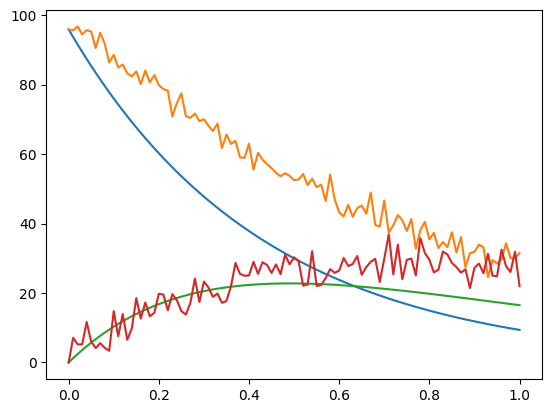

In [19]:
plt.plot(T,Y[0,:], T, Data[1,:])
plt.plot(T,Y[1,:], T, Data[2,:])
